## SHOPEE REVIEW SENTIMENT ANALYSIS USING NLP and K-NN Algorithm 
BY NUR ZAENAL WAHYU HIDAYAT


In [1]:
import string
import pandas as pd
import numpy as np


### IMPORTING DATASET
Dataset didapatkan menggunakan teknik web scraping dari website google playstore dengan software webharvy.
Di sini saya menggunakan library pandas untuk menampilkan dan membaca dataset.

In [2]:
#pip install google-play-scraper


In [3]:
import pandas as pd
import numpy as np  


# Scrap only 1000 data rows
from google_play_scraper import app, Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)


In [4]:
# Create a DataFrame from the 'result' data
data = pd.DataFrame(np.array(result), columns=['review'])

In [5]:
data.head()

,review
0,{'reviewId': '07ff333a-e825-4972-a2cf-cc5e86ce...
1,{'reviewId': '9389483d-8289-4cb1-81d2-ba42273b...
2,{'reviewId': '29cd4f29-0ad9-4142-90e0-ab116a02...
3,{'reviewId': '8b61addd-a767-40f2-82f1-9f02b3dc...
4,{'reviewId': 'fe797104-0676-4014-82d0-7b621a6b...


In [6]:
# Extract the 'review' column and create a new DataFrame
reviews_df = pd.DataFrame(data.pop('review').tolist())

# Join the new DataFrame with the original 'data' DataFrame
data = data.join(reviews_df)

# Display the first few rows of the updated 'data' DataFrame
data.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,07ff333a-e825-4972-a2cf-cc5e86ce76d7,Tia Ta,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi semakin lemot, jaringan bagus dengan ...",1,4327,3.12.13,2023-11-01 17:20:12,"Hi Kak, maaf buat kendala applikasi yang lamba...",2023-11-01 18:31:56,3.12.13
1,9389483d-8289-4cb1-81d2-ba42273bad60,grils trilcee,https://play-lh.googleusercontent.com/a-/ALV-U...,Maaf saya rubah dulu bintangnya dari 5 ke 2. K...,2,8355,3.11.30,2023-10-22 15:52:05,None,NaT,3.11.30
2,29cd4f29-0ad9-4142-90e0-ab116a0271bd,nani Safitri,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat sukaaaaaaaa . Aplikasi belanja terbaik ...,5,317,3.12.15,2023-11-09 23:29:38,"Hi kak, makasih buat bintang 5 dan reviewnya y...",2023-11-10 00:50:53,3.12.15
3,8b61addd-a767-40f2-82f1-9f02b3dc1a6e,Tania Dp,https://play-lh.googleusercontent.com/a/ACg8oc...,Dear shopee Pada saat checkout mohon bijak dal...,1,4233,3.11.12,2023-10-16 21:51:12,"Hi kak, maaf udh buat km gk nyaman terkait ken...",2023-10-16 22:10:00,3.11.12
4,fe797104-0676-4014-82d0-7b621a6b6754,M. Zakki Musaddad,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya kasih bintang 1 karena beberapa alasan : ...,1,1436,3.11.30,2023-10-27 07:04:46,"Hai kak, maaf ya buat km ga nyaman. Shopee aka...",2023-10-27 08:18:46,3.11.30


In [7]:
# long data scrapping 
len(data)

1000

In [8]:
# filter data only needed
data = data[['content','score']]
data.head()

,content,score
0,"Aplikasi semakin lemot, jaringan bagus dengan ...",1
1,Maaf saya rubah dulu bintangnya dari 5 ke 2. K...,2
2,Sangat sukaaaaaaaa . Aplikasi belanja terbaik ...,5
3,Dear shopee Pada saat checkout mohon bijak dal...,1
4,Saya kasih bintang 1 karena beberapa alasan : ...,1


In [9]:
# Corrected column renaming
data = data.rename(columns={'content': 'ulasan', 'score': 'Rating'})

data.head()

,ulasan,Rating
0,"Aplikasi semakin lemot, jaringan bagus dengan ...",1
1,Maaf saya rubah dulu bintangnya dari 5 ke 2. K...,2
2,Sangat sukaaaaaaaa . Aplikasi belanja terbaik ...,5
3,Dear shopee Pada saat checkout mohon bijak dal...,1
4,Saya kasih bintang 1 karena beberapa alasan : ...,1


In [10]:
data.to_csv('data_shopee_reviews.csv')

In [11]:
import pandas as pd

# Baca file CSV
filename = 'data_shopee_reviews.csv'
df = pd.read_csv(filename, encoding='latin-1')

# Tambahkan kolom SENTIMEN berdasarkan nilai Rating
df['SENTIMEN'] = df['Rating'].apply(lambda x: 'NEGATIF' if x <= 3.0 else 'POSITIF')

# Simpan DataFrame kembali ke file CSV jika perlu
df.to_csv('data_shopee_reviews_with_sentiment.csv', index=False)

In [12]:
data = pd.read_csv('data_shopee_reviews_with_sentiment.csv', sep=',', encoding='latin1')
data.head(10)

,Unnamed: 0,ulasan,Rating,SENTIMEN
0,0,"Aplikasi semakin lemot, jaringan bagus dengan ...",1,NEGATIF
1,1,Maaf saya rubah dulu bintangnya dari 5 ke 2. K...,2,NEGATIF
2,2,Sangat sukaaaaaaaa . Aplikasi belanja terbaik ...,5,POSITIF
3,3,Dear shopee Pada saat checkout mohon bijak dal...,1,NEGATIF
4,4,Saya kasih bintang 1 karena beberapa alasan : ...,1,NEGATIF
5,5,Setelah baca sekian banyak ulasan ternyata kel...,3,NEGATIF
6,6,Saya menunggu pesanan saya setengah bulan lebi...,1,NEGATIF
7,7,"Aplikasi lemot bahkan ngereset sendiri, udah n...",1,NEGATIF
8,8,"Aplikasi yang buruk, semakin hari semakin jele...",1,NEGATIF
9,9,"Aplikasi lemot, terlalu banyak iklan, sekarang...",2,NEGATIF


In [13]:
# Corrected column renaming
data = data.rename(columns={'ulasan' : 'Review'})
data

,Unnamed: 0,Review,Rating,SENTIMEN
0,0,"Aplikasi semakin lemot, jaringan bagus dengan ...",1,NEGATIF
1,1,Maaf saya rubah dulu bintangnya dari 5 ke 2. K...,2,NEGATIF
2,2,Sangat sukaaaaaaaa . Aplikasi belanja terbaik ...,5,POSITIF
3,3,Dear shopee Pada saat checkout mohon bijak dal...,1,NEGATIF
4,4,Saya kasih bintang 1 karena beberapa alasan : ...,1,NEGATIF
...,...,...,...,...
995,995,Kenapa Ga seperti sebelumnya ya. Untuk voucher...,3,NEGATIF
996,996,"E-commerce terbaik, ongkirnya bisa di nego, ap...",5,POSITIF
997,997,"Baru kali ini gw, cuman login aja 30 menit gk ...",1,NEGATIF
998,998,Sering bug. Kalo dibuka loadingnya ga jalan. S...,1,NEGATIF


### Proses Celaning Data

In [14]:
# proses case folding 
def casefolding(Review):
    Review = Review.lower()
    return Review
data['Review'] = data['Review'].apply(casefolding)
data.head(10)

,Unnamed: 0,Review,Rating,SENTIMEN
0,0,"aplikasi semakin lemot, jaringan bagus dengan ...",1,NEGATIF
1,1,maaf saya rubah dulu bintangnya dari 5 ke 2. k...,2,NEGATIF
2,2,sangat sukaaaaaaaa . aplikasi belanja terbaik ...,5,POSITIF
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF
4,4,saya kasih bintang 1 karena beberapa alasan : ...,1,NEGATIF
5,5,setelah baca sekian banyak ulasan ternyata kel...,3,NEGATIF
6,6,saya menunggu pesanan saya setengah bulan lebi...,1,NEGATIF
7,7,"aplikasi lemot bahkan ngereset sendiri, udah n...",1,NEGATIF
8,8,"aplikasi yang buruk, semakin hari semakin jele...",1,NEGATIF
9,9,"aplikasi lemot, terlalu banyak iklan, sekarang...",2,NEGATIF


In [15]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Review):
    Review = Review.strip(" ")
    Review = re.sub(r'[?|$|.|!_:")(-+,]', '', Review)
    Review = re.sub(r'\d+', '', Review)
    Review = re.sub(r"\b[a-zA-Z]\b", "", Review)
    Review = re.sub('\s+',' ', Review)
    return Review
data['Review'] = data['Review'].apply(cleansing)
data.head(10)


,Unnamed: 0,Review,Rating,SENTIMEN
0,0,aplikasi semakin lemot jaringan bagus dengan k...,1,NEGATIF
1,1,maaf saya rubah dulu bintangnya dari ke karena...,2,NEGATIF
2,2,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,5,POSITIF
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF
4,4,saya kasih bintang karena beberapa alasan apli...,1,NEGATIF
5,5,setelah baca sekian banyak ulasan ternyata kel...,3,NEGATIF
6,6,saya menunggu pesanan saya setengah bulan lebi...,1,NEGATIF
7,7,aplikasi lemot bahkan ngereset sendiri udah nu...,1,NEGATIF
8,8,aplikasi yang buruk semakin hari semakin jelek...,1,NEGATIF
9,9,aplikasi lemot terlalu banyak iklan sekarang h...,2,NEGATIF


In [16]:
data.to_csv('data_shopee_cleansing.csv', index=False)

In [17]:
df = pd.read_csv('data_shopee_cleansing.csv')
df.head()

,Unnamed: 0,Review,Rating,SENTIMEN
0,0,aplikasi semakin lemot jaringan bagus dengan k...,1,NEGATIF
1,1,maaf saya rubah dulu bintangnya dari ke karena...,2,NEGATIF
2,2,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,5,POSITIF
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF
4,4,saya kasih bintang karena beberapa alasan apli...,1,NEGATIF


In [18]:
import string
import re

In [19]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

In [20]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Unnamed: 0,Review,Rating,SENTIMEN,cleaned_text,label,Review_len,punct
0,0,aplikasi semakin lemot jaringan bagus dengan k...,1,NEGATIF,aplikasi semakin lemot jaringan bagus dengan k...,0,338,0.0
1,1,maaf saya rubah dulu bintangnya dari ke karena...,2,NEGATIF,maaf saya rubah dulu bintangnya dari ke karena...,0,403,0.2
2,2,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,5,POSITIF,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,1,265,0.0
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF,dear shopee pada saat checkout mohon bijak dal...,0,415,0.2
4,4,saya kasih bintang karena beberapa alasan apli...,1,NEGATIF,saya kasih bintang karena beberapa alasan apli...,0,377,0.0


In [21]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Unnamed: 0,Review,Rating,SENTIMEN,cleaned_text,label,Review_len,punct,tokens
0,0,aplikasi semakin lemot jaringan bagus dengan k...,1,NEGATIF,aplikasi semakin lemot jaringan bagus dengan k...,0,338,0.0,"[aplikasi, semakin, lemot, jaringan, bagus, de..."
1,1,maaf saya rubah dulu bintangnya dari ke karena...,2,NEGATIF,maaf saya rubah dulu bintangnya dari ke karena...,0,403,0.2,"[maaf, saya, rubah, dulu, bintangnya, dari, ke..."
2,2,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,5,POSITIF,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,1,265,0.0,"[sangat, sukaaaaaaaa, aplikasi, belanja, terba..."
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF,dear shopee pada saat checkout mohon bijak dal...,0,415,0.2,"[dear, shopee, pada, saat, checkout, mohon, bi..."
4,4,saya kasih bintang karena beberapa alasan apli...,1,NEGATIF,saya kasih bintang karena beberapa alasan apli...,0,377,0.0,"[saya, kasih, bintang, karena, beberapa, alasa..."


In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nzen4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nzen4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nzen4\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Unnamed: 0,Review,Rating,SENTIMEN,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,0,aplikasi semakin lemot jaringan bagus dengan k...,1,NEGATIF,aplikasi semakin lemot jaringan bagus dengan k...,0,338,0.0,"[aplikasi, semakin, lemot, jaringan, bagus, de...",aplikasi semakin lemot jaringan bagus dengan k...
1,1,maaf saya rubah dulu bintangnya dari ke karena...,2,NEGATIF,maaf saya rubah dulu bintangnya dari ke karena...,0,403,0.2,"[maaf, saya, rubah, dulu, bintangnya, dari, ke...",maaf saya rubah dulu bintangnya dari ke karena...
2,2,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,5,POSITIF,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,1,265,0.0,"[sangat, sukaaaaaaaa, aplikasi, belanja, terba...",sangat sukaaaaaaaa aplikasi belanja terbaik pi...
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF,dear shopee pada saat checkout mohon bijak dal...,0,415,0.2,"[dear, shopee, pada, saat, checkout, mohon, bi...",dear shopee pada saat checkout mohon bijak dal...
4,4,saya kasih bintang karena beberapa alasan apli...,1,NEGATIF,saya kasih bintang karena beberapa alasan apli...,0,377,0.0,"[saya, kasih, bintang, karena, beberapa, alasa...",saya kasih bintang karena beberapa alasan apli...


In [24]:
#EDA
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 1000 rows and 10 columns
rating 1.0 = 526 rows
rating 2.0 = 141 rows
rating 3.0 = 98 rows
rating 4.0 = 51 rows
rating 5.0 = 184 rows


Number of null in label: 0
Number of null in text: 0


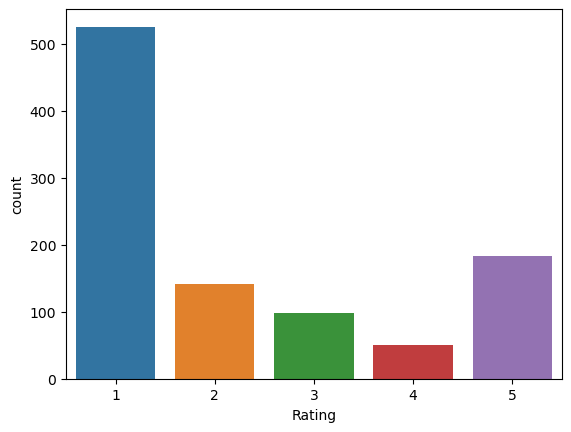

In [25]:
import seaborn as sns
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum()}")
sns.countplot(x='Rating', data=df);

### Proses Stemming dan Membuat file data baru (dataset yang sudah dibersihkan melalui proses NLTK)

In [26]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [27]:
data_clean = pd.read_csv('data_shopee_cleansing.csv', encoding='latin1')
data_clean.head()

,Unnamed: 0,Review,Rating,SENTIMEN
0,0,aplikasi semakin lemot jaringan bagus dengan k...,1,NEGATIF
1,1,maaf saya rubah dulu bintangnya dari ke karena...,2,NEGATIF
2,2,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,5,POSITIF
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF
4,4,saya kasih bintang karena beberapa alasan apli...,1,NEGATIF


In [28]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Review' : 'string'})
data_clean.dtypes

Unnamed: 0       int64
Review          string
Rating           int64
SENTIMEN      category
dtype: object

## Proses TF-IDF

In [29]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Review'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Review'].astype('U'))
print(text_tf)

  (0, 4960)	0.13806302610687488
  (0, 1246)	0.14684685265012665
  (0, 123)	0.13571582425983084
  (0, 1630)	0.09793975268545137
  (0, 897)	0.047840568440657594
  (0, 4847)	0.1136022350247902
  (0, 160)	0.11979135030566386
  (0, 965)	0.11679231725397378
  (0, 605)	0.1316017867364241
  (0, 3690)	0.14355837777734687
  (0, 1761)	0.128077645189356
  (0, 4349)	0.1506431182867719
  (0, 843)	0.0939374023354682
  (0, 3652)	0.11453166530948018
  (0, 597)	0.09608022973547103
  (0, 279)	0.10651749451536519
  (0, 2680)	0.13865012026370552
  (0, 4982)	0.12648825635040298
  (0, 3432)	0.15540434745535472
  (0, 1574)	0.08341074733209371
  (0, 2031)	0.2173206438307361
  (0, 4121)	0.18870262178840883
  (0, 3482)	0.33552724974469544
  (0, 815)	0.38933019366954824
  (0, 619)	0.1444750209822573
  :	:
  (999, 4108)	0.1586923778056371
  (999, 3802)	0.14321727416676602
  (999, 3460)	0.1559220985871265
  (999, 1423)	0.18009409715970323
  (999, 3840)	0.14321727416676602
  (999, 2281)	0.14722629040864146
  (999, 1

## Proses Cosine Similarity 

In [30]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.12246111 0.04727829 ... 0.06276202 0.0285149  0.20993621]
 [0.12246111 1.         0.0257062  ... 0.05488766 0.01589115 0.0474542 ]
 [0.04727829 0.0257062  1.         ... 0.05001307 0.         0.01905859]
 ...
 [0.06276202 0.05488766 0.05001307 ... 1.         0.         0.04255377]
 [0.0285149  0.01589115 0.         ... 0.         1.         0.        ]
 [0.20993621 0.0474542  0.01905859 ... 0.04255377 0.         1.        ]]


In [32]:
# splitting data 
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (200, 1000)
Jumlah Data Latih: (800, 1000)
Jumlah data uji dengan sentimen positif: 46
Jumlah data uji dengan sentimen negatif: 154
Jumlah data latih dengan sentimen positif: 189
Jumlah data latih dengan sentimen negatif: 611


NEGATIF    765
POSITIF    235
Name: SENTIMEN, dtype: int64

### Perform algoritma KNN 

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [34]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))


confusion matrix:
 [[146   8]
 [ 27  19]]

TN: 146
FP: 8
FN: 27
TP: 19
              precision    recall  f1-score   support

     NEGATIF       0.84      0.95      0.89       154
     POSITIF       0.70      0.41      0.52        46

    accuracy                           0.82       200
   macro avg       0.77      0.68      0.71       200
weighted avg       0.81      0.82      0.81       200


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.825
Precision: 0.7037037037037037
Recall: 0.41304347826086957
f1_score: 0.5205479452054794
error_rate: 0.17500000000000004


In [35]:
# splitting data 70:30
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (300, 1000)
Jumlah Data Latih: (700, 1000)
Jumlah data uji dengan sentimen positif: 73
Jumlah data uji dengan sentimen negatif: 227
Jumlah data latih dengan sentimen positif: 162
Jumlah data latih dengan sentimen negatif: 538


NEGATIF    765
POSITIF    235
Name: SENTIMEN, dtype: int64

In [36]:
# perform algoritma dengan 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))


knn Accuracy: 0.8
knn Precision: 0.8646288209606987
knn Recall: 0.8722466960352423
knn f1_score: 0.8684210526315789
confusion matrix:
 [[198  29]
 [ 31  42]]

              precision    recall  f1-score   support

     NEGATIF       0.86      0.87      0.87       227
     POSITIF       0.59      0.58      0.58        73

    accuracy                           0.80       300
   macro avg       0.73      0.72      0.73       300
weighted avg       0.80      0.80      0.80       300



In [37]:
# splitting data 60:40
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.4, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (400, 1000)
Jumlah Data Latih: (600, 1000)
Jumlah data uji dengan sentimen positif: 97
Jumlah data uji dengan sentimen negatif: 303
Jumlah data latih dengan sentimen positif: 138
Jumlah data latih dengan sentimen negatif: 462


NEGATIF    765
POSITIF    235
Name: SENTIMEN, dtype: int64

In [38]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))


knn Accuracy: 0.835
knn Precision: 0.8356940509915014
knn Recall: 0.9735973597359736
knn f1_score: 0.8993902439024389
confusion matrix:
 [[295   8]
 [ 58  39]]

              precision    recall  f1-score   support

     NEGATIF       0.84      0.97      0.90       303
     POSITIF       0.83      0.40      0.54        97

    accuracy                           0.83       400
   macro avg       0.83      0.69      0.72       400
weighted avg       0.83      0.83      0.81       400



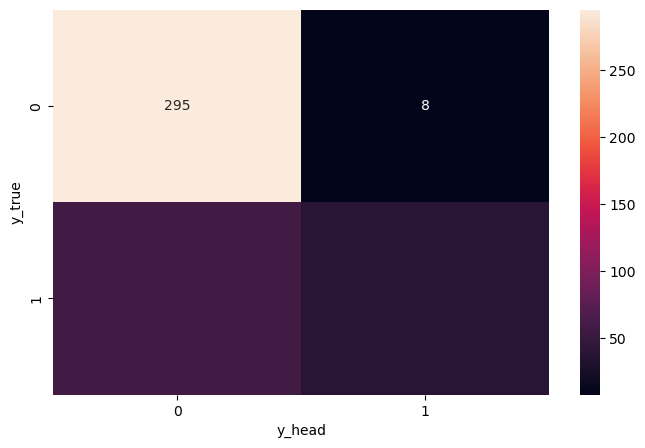

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [40]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [41]:
data_clean = pd.read_csv('data_shopee_cleansing.csv', encoding='latin1')
data_clean.head()

,Unnamed: 0,Review,Rating,SENTIMEN
0,0,aplikasi semakin lemot jaringan bagus dengan k...,1,NEGATIF
1,1,maaf saya rubah dulu bintangnya dari ke karena...,2,NEGATIF
2,2,sangat sukaaaaaaaa aplikasi belanja terbaik pi...,5,POSITIF
3,3,dear shopee pada saat checkout mohon bijak dal...,1,NEGATIF
4,4,saya kasih bintang karena beberapa alasan apli...,1,NEGATIF


In [42]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Review' : 'string'})
data_clean.dtypes

Unnamed: 0       int64
Review          string
Rating           int64
SENTIMEN      category
dtype: object

In [43]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Review'].astype('U'))
print(text_tf)

  (0, 4960)	0.13806302610687488
  (0, 1246)	0.14684685265012665
  (0, 123)	0.13571582425983084
  (0, 1630)	0.09793975268545137
  (0, 897)	0.047840568440657594
  (0, 4847)	0.1136022350247902
  (0, 160)	0.11979135030566386
  (0, 965)	0.11679231725397378
  (0, 605)	0.1316017867364241
  (0, 3690)	0.14355837777734687
  (0, 1761)	0.128077645189356
  (0, 4349)	0.1506431182867719
  (0, 843)	0.0939374023354682
  (0, 3652)	0.11453166530948018
  (0, 597)	0.09608022973547103
  (0, 279)	0.10651749451536519
  (0, 2680)	0.13865012026370552
  (0, 4982)	0.12648825635040298
  (0, 3432)	0.15540434745535472
  (0, 1574)	0.08341074733209371
  (0, 2031)	0.2173206438307361
  (0, 4121)	0.18870262178840883
  (0, 3482)	0.33552724974469544
  (0, 815)	0.38933019366954824
  (0, 619)	0.1444750209822573
  :	:
  (999, 4108)	0.1586923778056371
  (999, 3802)	0.14321727416676602
  (999, 3460)	0.1559220985871265
  (999, 1423)	0.18009409715970323
  (999, 3840)	0.14321727416676602
  (999, 2281)	0.14722629040864146
  (999, 1

In [44]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.12246111 0.04727829 ... 0.06276202 0.0285149  0.20993621]
 [0.12246111 1.         0.0257062  ... 0.05488766 0.01589115 0.0474542 ]
 [0.04727829 0.0257062  1.         ... 0.05001307 0.         0.01905859]
 ...
 [0.06276202 0.05488766 0.05001307 ... 1.         0.         0.04255377]
 [0.0285149  0.01589115 0.         ... 0.         1.         0.        ]
 [0.20993621 0.0474542  0.01905859 ... 0.04255377 0.         1.        ]]


In [45]:
# splitting data menjadi 30 dan 70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.2, random_state=33)
print(X_test)
print(y_test)

[[0.04515052 0.03238534 0.05177779 ... 0.13477194 0.         0.00851674]
 [0.04891716 0.08627461 0.04839019 ... 0.01177121 0.01851332 0.06005915]
 [0.05930797 0.04212497 0.03507124 ... 0.04700291 0.02080572 0.03287104]
 ...
 [0.01131768 0.05269068 0.03829797 ... 0.01118799 0.         0.01326184]
 [0.06670243 0.0514636  0.02060427 ... 0.02241708 0.04273541 0.03870752]
 [0.00793506 0.09883084 0.03251757 ... 0.01687879 0.         0.06301368]]
286    NEGATIF
402    NEGATIF
253    POSITIF
4      NEGATIF
372    NEGATIF
        ...   
358    POSITIF
626    NEGATIF
207    POSITIF
714    NEGATIF
122    POSITIF
Name: SENTIMEN, Length: 200, dtype: category
Categories (2, object): ['NEGATIF', 'POSITIF']


In [46]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.73
knn Precision: 0.39473684210526316
knn Recall: 0.32608695652173914
knn f1_score: 0.35714285714285715
confusion matrix:
 [[131  23]
 [ 31  15]]

              precision    recall  f1-score   support

     NEGATIF       0.81      0.85      0.83       154
     POSITIF       0.39      0.33      0.36        46

    accuracy                           0.73       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.71      0.73      0.72       200



In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
tn, fp, fn, tp

(131, 23, 31, 15)

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10)

array([0.81, 0.82, 0.78, 0.81, 0.82, 0.84, 0.84, 0.78, 0.83, 0.82])

In [50]:
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10).mean()

0.8150000000000001